<a href="https://colab.research.google.com/github/usshaa/BK_BIRLA_DL/blob/main/02_DL/03_Predict_house_prices_based_on_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANN for Regression**

### 🎯 Objective: Predict House Prices Based on Features

We'll use **Boston Housing dataset**, which is ideal for demonstrating regression with neural networks.

#### 1. 📦 Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#### 2. 📊 Load and Preprocess Data

In [ ]:
# Load Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
X = data
y = target

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3. 🏗️ Build ANN Model for Regression

In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # No activation in output for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### 4. ⚙️ Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### 5. 🚀 Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.1, verbose=0)

### 6. 📈 Visualize Training Loss

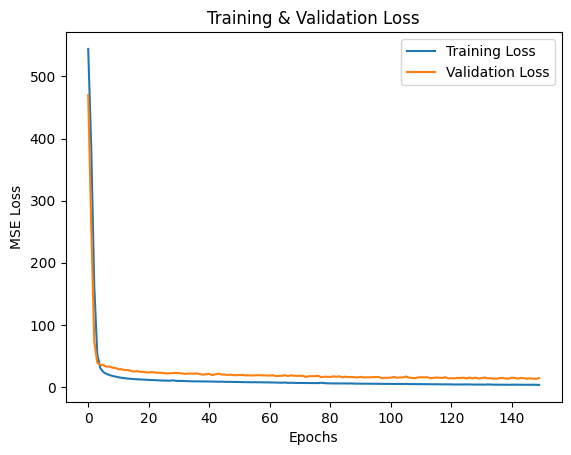

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

### 7. ✅ Evaluate Model Performance

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"\nTest Mean Squared Error: {mse:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Test Mean Squared Error: 10.16


| **Concept**           | **Implementation**                                  |
| --------------------- | --------------------------------------------------- |
| **Regression Output** | `Dense(1)` with no activation function              |
| **Loss Function**     | `'mean_squared_error'` for regression               |
| **Optimizer**         | `'adam'` for fast convergence                       |
| **Evaluation Metric** | Mean Absolute Error (MAE), Mean Squared Error (MSE) |
| **Normalization**     | Important for ANN performance on regression tasks   |
